In [774]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib.pyplot
# !pip install seaborn
# !pip install Scikit-learn

## Exploratory Data Analysis

In [775]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [776]:
df = pd.read_csv('loan_data_set.csv')

In [777]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [778]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [779]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Checking for Missing Values

In [780]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Dropped 'Loan_ID' column, useless

In [781]:
df = df.drop('Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Preparation

Handeling Missing Values


In [782]:
# Replacing null values with their mean or median
df.fillna({'Gender': df['Gender'].mode()[0]}, inplace = True)
df.fillna({'Married': df['Married'].mode()[0]}, inplace = True)
df.fillna({'Dependents': df['Dependents'].mode()[0]}, inplace = True)
df.fillna({'Self_Employed': df['Self_Employed'].mode()[0]}, inplace = True)
df.fillna({'Loan_Amount_Term': df['Loan_Amount_Term'].mode()[0]}, inplace = True)
df.fillna({'Credit_History': df['Credit_History'].mode()[0]}, inplace = True)
df.fillna({'LoanAmount': df['LoanAmount'].mean()}, inplace=True)

In [783]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [784]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Converting categorical values to numerical

In [785]:
categorical = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Amount_Term', 'Dependents', 'Loan_Status']

for col in categorical:
    df[col] = LabelEncoder().fit_transform(df[col])

In [786]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,8,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,8,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,8,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,8,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,8,1,2,1


<Axes: xlabel='Gender', ylabel='count'>

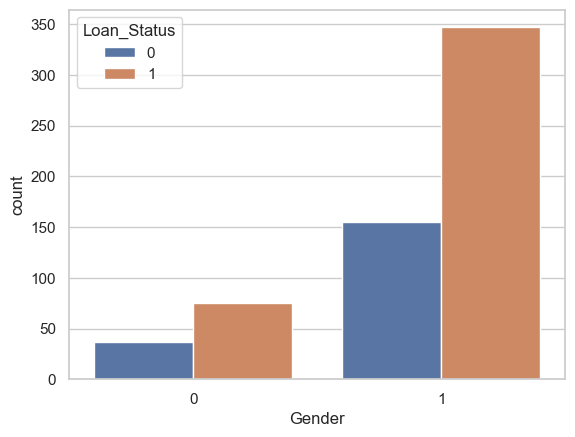

In [787]:
sns.countplot(x='Gender', data=df, hue='Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

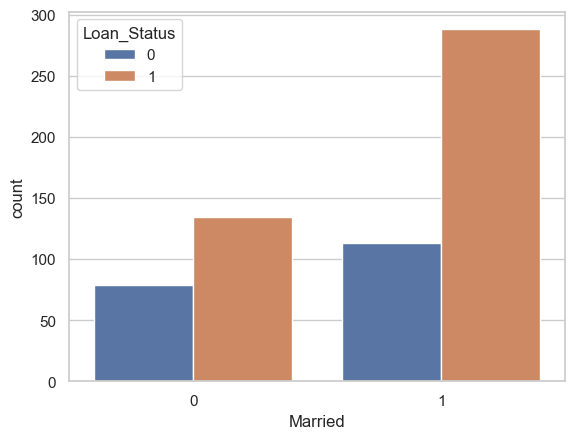

In [788]:
sns.countplot(x='Married', data=df, hue='Loan_Status')

<Axes: xlabel='Education', ylabel='count'>

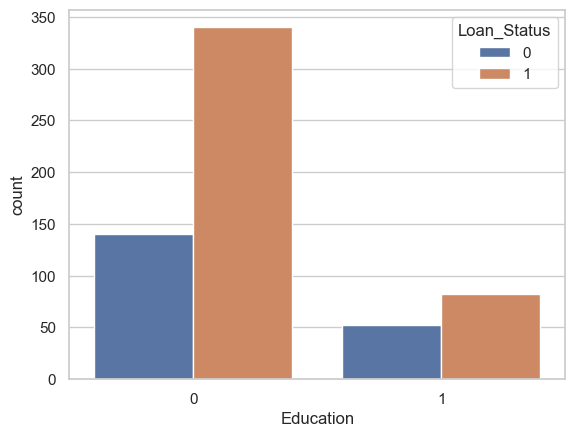

In [789]:
sns.countplot(x='Education', data=df, hue='Loan_Status')

<Axes: xlabel='Property_Area', ylabel='count'>

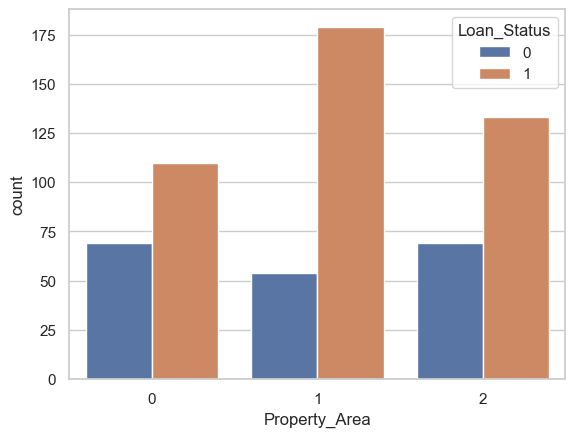

In [790]:
sns.countplot(x='Property_Area', data=df, hue='Loan_Status')

Outlier Checking

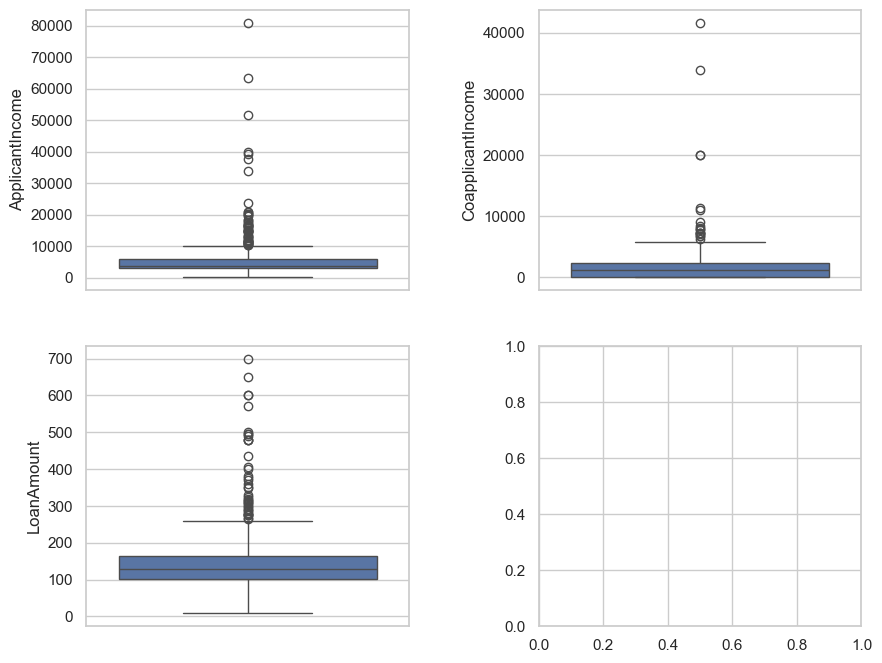

In [791]:
fig, axs = plt.subplots(2,2, figsize = (10,8))
plt1 = sns.boxplot(df['ApplicantIncome'], ax = axs[0,0])
plt2 = sns.boxplot(df['CoapplicantIncome'], ax = axs[0,1])
plt2 = sns.boxplot(df['LoanAmount'], ax = axs[1,0])
plt.subplots_adjust(wspace=0.4)

Outlier Removing

In [792]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return column[(column >= Q1 - 1.5*IQR) & (column <= Q3 + 1.5*IQR)]

df['ApplicantIncome'] = remove_outliers(df['ApplicantIncome'])
df['CoapplicantIncome'] = remove_outliers(df['CoapplicantIncome'])
df['LoanAmount'] = remove_outliers(df['LoanAmount'])

# Removing null data
df = df.dropna().reset_index().drop('index', axis=1)

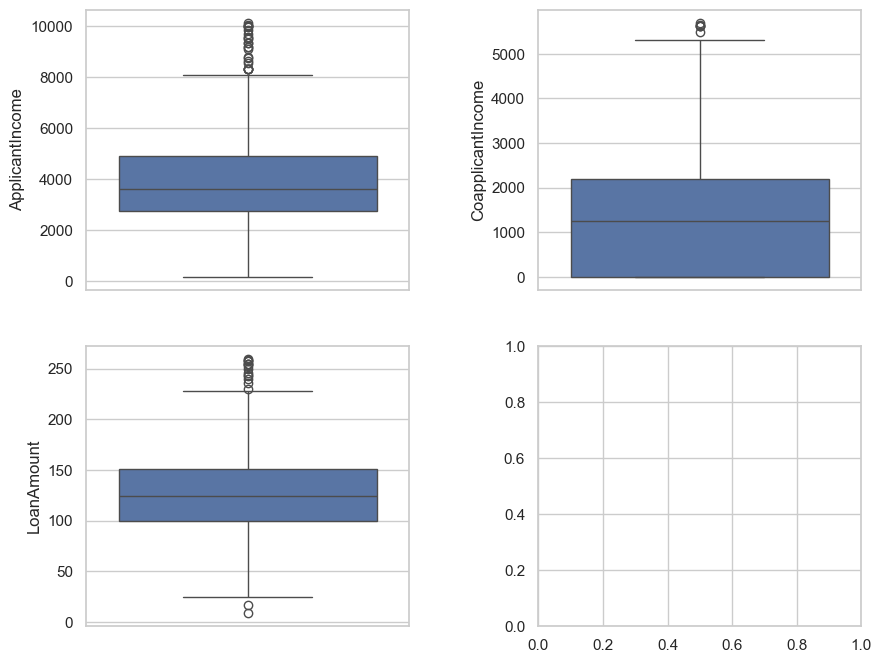

In [793]:
fig, axs = plt.subplots(2,2, figsize = (10,8))
plt1 = sns.boxplot(df['ApplicantIncome'], ax = axs[0,0])
plt2 = sns.boxplot(df['CoapplicantIncome'], ax = axs[0,1])
plt2 = sns.boxplot(df['LoanAmount'], ax = axs[1,0])
plt.subplots_adjust(wspace=0.4)

In [794]:
# df.head()

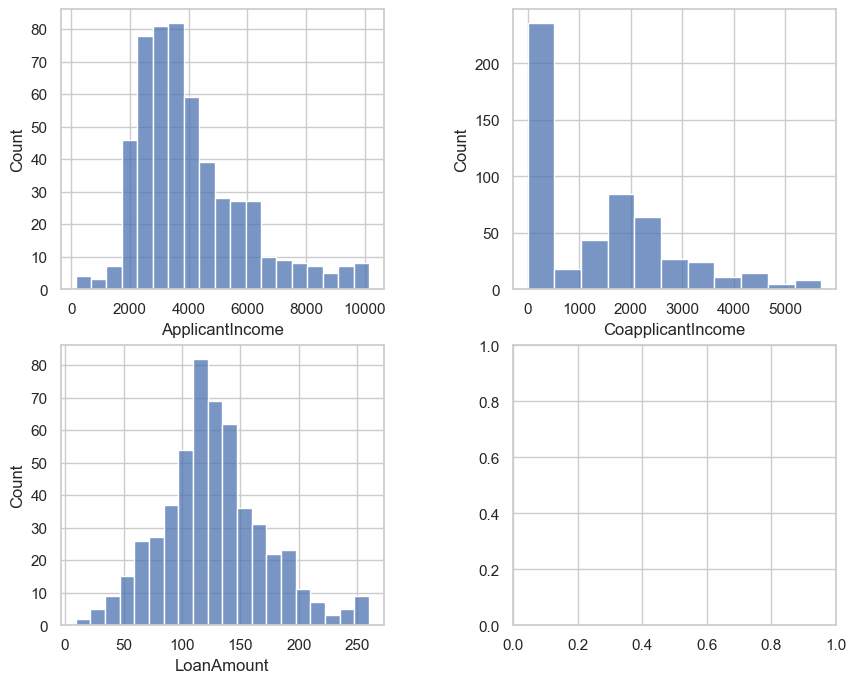

In [795]:
fig, axs = plt.subplots(2, 2, figsize=((10, 8)))
sns.histplot(data=df['ApplicantIncome'], ax=axs[0,0])
sns.histplot(data=df['CoapplicantIncome'], ax=axs[0,1])
sns.histplot(data=df['LoanAmount'], ax=axs[1,0])
plt.subplots_adjust(wspace=0.4)

Splitting the Dataset

In [796]:
y = df.pop('Loan_Status')
X = df

Scaling

In [797]:
# using min-max-scaler to scale the X set
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [798]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Model Building

#### Logistic Regression

In [799]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [800]:
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8260869565217391


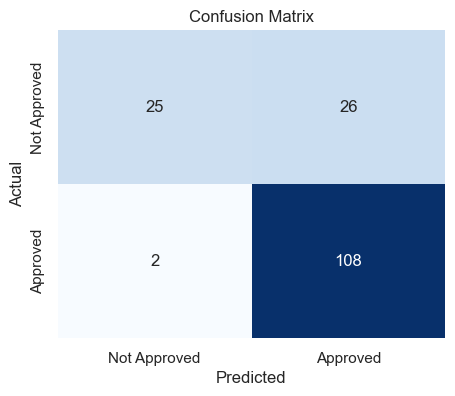

In [801]:
cfmx = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cfmx, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Decision Tree Classifier

In [802]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [803]:
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7142857142857143


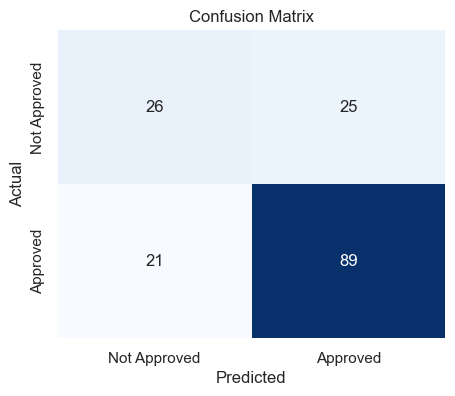

In [804]:
cfmx = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cfmx, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Random Forest

In [805]:
rfc = RandomForestClassifier(random_state=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [806]:
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8136645962732919


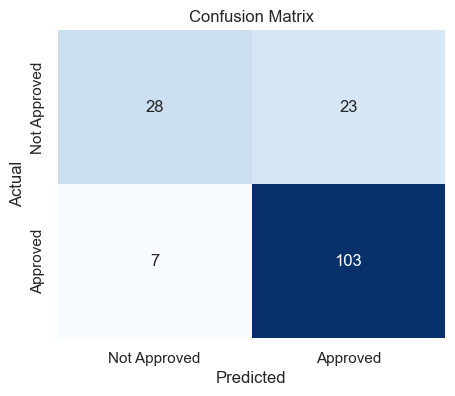

In [807]:
cfmx = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cfmx, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()